In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import klib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [4]:
raw_data = pd.read_csv('HepatitisCdata.csv')
data = raw_data.copy()
data.head()


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
data.dtypes     # it shows the data type of each column

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [6]:
data.shape       # it shows the total number of row and columns of the dataset

(615, 14)

In [7]:
data.nunique()    # it shows the total number of uniques values in each column of the dataset

Unnamed: 0    615
Category        5
Age            49
Sex             2
ALB           189
ALP           414
ALT           341
AST           297
BIL           188
CHE           407
CHOL          313
CREA          117
GGT           358
PROT          198
dtype: int64

In [8]:
data.info()     # provides basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [9]:
data.count()     # it shows the total number of non-null in each solumn

Unnamed: 0    615
Category      615
Age           615
Sex           615
ALB           614
ALP           597
ALT           614
AST           615
BIL           615
CHE           615
CHOL          605
CREA          615
GGT           615
PROT          614
dtype: int64

In [10]:
data.isnull().sum()     #to find out all the Null Values in the data

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [11]:
data = data.dropna(how='any', axis=0)   # to eliminate ALL the NaN or Null values
data.isnull().sum()                     #to find out all the Null Values in the data

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  589 non-null    int64  
 1   Category    589 non-null    object 
 2   Age         589 non-null    int64  
 3   Sex         589 non-null    object 
 4   ALB         589 non-null    float64
 5   ALP         589 non-null    float64
 6   ALT         589 non-null    float64
 7   AST         589 non-null    float64
 8   BIL         589 non-null    float64
 9   CHE         589 non-null    float64
 10  CHOL        589 non-null    float64
 11  CREA        589 non-null    float64
 12  GGT         589 non-null    float64
 13  PROT        589 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 69.0+ KB


# * We need to transform the data in 'Category' and 'Sex' by creating dummy variables

In [13]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [14]:
data['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [15]:
data['Category'] = data['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 4, '1=Hepatitis': 1, '2=Fibrosis': 2, '3=Cirrhosis': 3})
data['Category'].unique()

array([0, 4, 1, 2, 3], dtype=int64)

In [16]:
data['Sex'].unique()

array(['m', 'f'], dtype=object)

In [17]:
data['Sex'] = data['Sex'].map({'m': 0, 'f': 1})


In [18]:
data['Sex'].unique()

array([0, 1], dtype=int64)

In [19]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [20]:
y = data['Category']

x = data[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

In [21]:
x = sm.add_constant(x.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     72.71
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          6.33e-107
Time:                        12:12:51   Log-Likelihood:                -419.83
No. Observations:                 589   AIC:                             865.7
Df Residuals:                     576   BIC:                             922.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6678      0.325      5.138      0.000       1.030       2.305
x1             0.0048      0.002      2.199      0.028       0.001       0.009
x2             0.0426      0.046      0.923      0.356      -0.048       0.133
x3            -0.0287      0.005     -6.112      0.000      -0.038      -0.019
x4            -0.0020      0.001     -2.134      0.033      -0.004      -0.000
x5             0.0003      0.001      0.254      0.800      -0.002       0.002
x6             0.0087      0.001     10.928      0.000       0.007       0.010
x7             0.0099      0.001      7.441      0.000       0.007       0.013
x8            -0.0062      0.012     -0.521      0.602      -0.029       0.017
x9            -0.0737      0.022     -3.422      0.001      -0.116      -0.031
x10            0.0026      0.000      6.059      0.000       0.002       0.003
x11            0.0034      0.001      6.758      0.000       0.002       0.004
x12           -0.0089      0.005     -1.808      0.071      -0.019       0.001
==============================================================================
Omnibus:                      300.050   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7375.778
Skew:                           1.707   Prob(JB):                         0.00
Kurtosis:                      19.997   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ploting the variables: 'Category' and 'Age'

In [22]:
y = data['Category']

x1 = data['Age']

In [23]:
x = sm.add_constant(x1.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     13.99
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           0.000202
Time:                        12:12:56   Log-Likelihood:                -684.48
No. Observations:                 589   AIC:                             1373.
Df Residuals:                     587   BIC:                             1382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3261      0.156     -2.092      0.037      -0.632      -0.020
x1             0.0120      0.003      3.740      0.000       0.006       0.018
==============================================================================
Omnibus:                      400.920   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3095.325
Skew:                           3.155   Prob(JB):                         0.00
Kurtosis:                      12.290   Cond. No.                         237.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

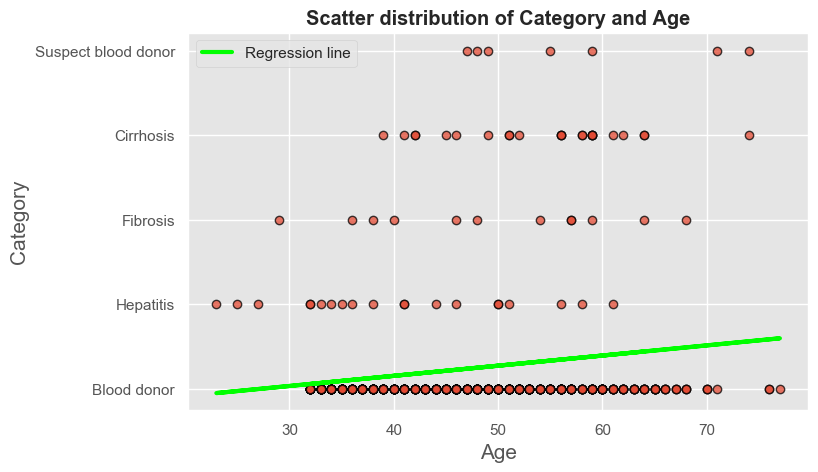

In [67]:
plt.figure(figsize=(8,5), dpi=100)

plt.scatter(x1,y, edgecolor = 'black', linewidth=1, alpha=0.75)

yhat = 0.0120*x1 - 0.3261    # Linear Regression Equation

fig = plt.plot(x1,yhat,lw=3, c='lime', label='Regression line')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Category',fontsize=15)

plt.yticks(data.Category[::1].tolist())

plt.title('Scatter distribution of Category and Age', fontdict={'fontweight':'bold'})

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'Sex'

In [25]:
y = data['Category']
x2 = data['Sex'] 

In [26]:
x =  sm.add_constant(x2.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.730
Date:                Sat, 30 Oct 2021   Prob (F-statistic):             0.0990
Time:                        12:13:13   Log-Likelihood:                -690.05
No. Observations:                 589   AIC:                             1384.
Df Residuals:                     587   BIC:                             1393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2865      0.041      6.979      0.000       0.206       0.367
x1            -0.1095      0.066     -1.652      0.099      -0.240       0.021
==============================================================================
Omnibus:                      418.734   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3537.581
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      13.023   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

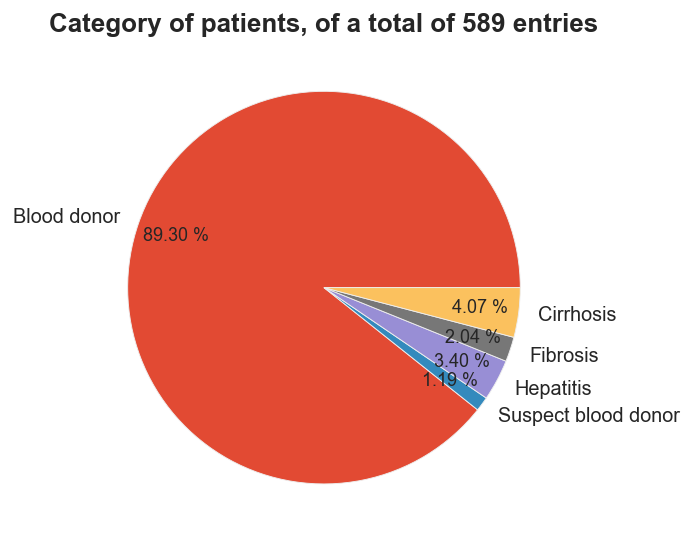

In [50]:
plt.figure(figsize=(8,5), dpi=130)

plt.style.use('ggplot')

blood_donor = data.loc[data.Category == 0].count()[0]
suspect_blood_donor = data.loc[data.Category == 4].count()[0]
hepatitis = data.loc[data.Category == 1].count()[0]
fibrosis = data.loc[data.Category == 2].count()[0]
cirrhosis = data.loc[data.Category == 3].count()[0]

category = [blood_donor, suspect_blood_donor, hepatitis, fibrosis, cirrhosis]
labels = ['Blood donor', 'Suspect blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis']

plt.title('Category of patients, of a total of 589 entries', fontdict={'fontweight':'bold'})

plt.pie(category, labels = labels, autopct = '%.2f %%', pctdistance = 0.8)

plt.show()

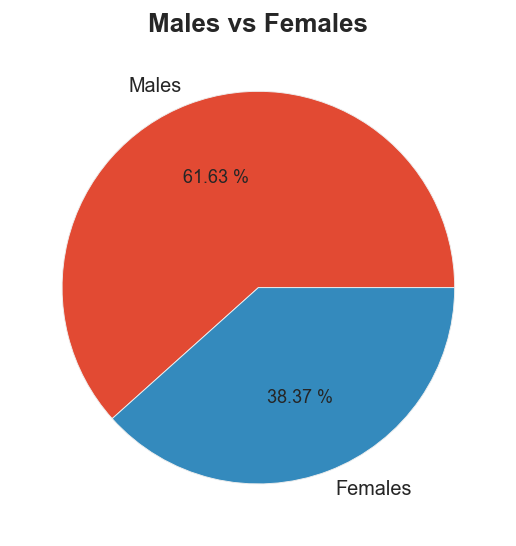

In [51]:
plt.figure(figsize=(8,5), dpi=130)

plt.style.use('ggplot')

male = data.loc[data.Sex == 0].count()[0]
female = data.loc[data.Sex == 1].count()[0]

sex = [male, female]
labels = ['Males', 'Females']

plt.title('Males vs Females', fontdict={'fontweight':'bold'})

plt.pie(sex, labels = labels, autopct = '%.2f %%', pctdistance = 0.6)

plt.show()

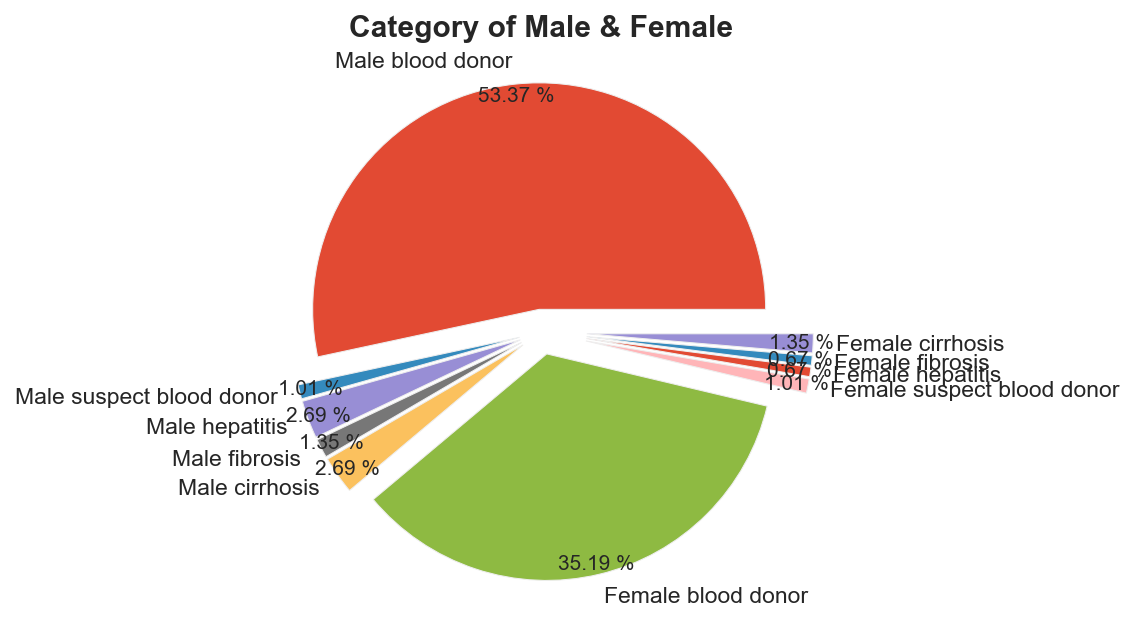

In [52]:
plt.figure(figsize=(8,5), dpi=150)

plt.style.use('ggplot')

male_blood_donor = data.loc[(data['Category'] == 0) & (data['Sex'] == 0)].count()[0]
male_suspect_blood_donor = data.loc[(data['Category'] == 4) & (data['Sex'] == 0)].count()[0]
male_hepatitis = data.loc[(data['Category'] == 1) & (data['Sex'] == 0)].count()[0]
male_fibrosis = data.loc[(data['Category'] == 2) & (data['Sex'] == 0)].count()[0]
male_cirrhosis = data.loc[(data['Category'] == 3) & (data['Sex'] == 0)].count()[0]
female_blood_donor = data.loc[(data['Category'] == 0) & (data['Sex'] == 1)].count()[0]
female_suspect_blood_donor = data.loc[(data['Category'] == 4) & (data['Sex'] == 0)].count()[0]
female_hepatitis = data.loc[(data['Category'] == 1) & (data['Sex'] == 1)].count()[0]
female_fibrosis = data.loc[(data['Category'] == 2) & (data['Sex'] == 1)].count()[0]
female_cirrhosis = data.loc[(data['Category'] == 3) & (data['Sex'] == 1)].count()[0]

sex = [male_blood_donor, male_suspect_blood_donor, male_hepatitis, male_fibrosis, male_cirrhosis, female_blood_donor, female_suspect_blood_donor, female_hepatitis, female_fibrosis, female_cirrhosis]
labels = ['Male blood donor', 'Male suspect blood donor', 'Male hepatitis', 'Male fibrosis', 'Male cirrhosis', 'Female blood donor', 'Female suspect blood donor', 'Female hepatitis', 'Female fibrosis', 'Female cirrhosis']
explode = (.1,.1,.1,.1,.1,.1,.2,.2,.2,.2)

plt.title('Category of Male & Female', fontdict={'fontweight':'bold'})

plt.pie(sex, labels = labels, autopct = '%.2f %%', pctdistance = 0.95, explode = explode)

plt.show()

# Ploting the variables: 'Category' and 'ALB' (Albumin Blood Test)

In [30]:
y = data ['Category']
x2 = data['ALB']

In [31]:
x = sm.add_constant(x2.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           3.90e-26
Time:                        12:13:25   Log-Likelihood:                -635.27
No. Observations:                 589   AIC:                             1275.
Df Residuals:                     587   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6022      0.214     12.140      0.000       2.181       3.023
x1            -0.0566      0.005    -11.104      0.000      -0.067      -0.047
==============================================================================
Omnibus:                      304.850   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1463.036
Skew:                           2.405   Prob(JB):                         0.00
Kurtosis:                       9.040   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

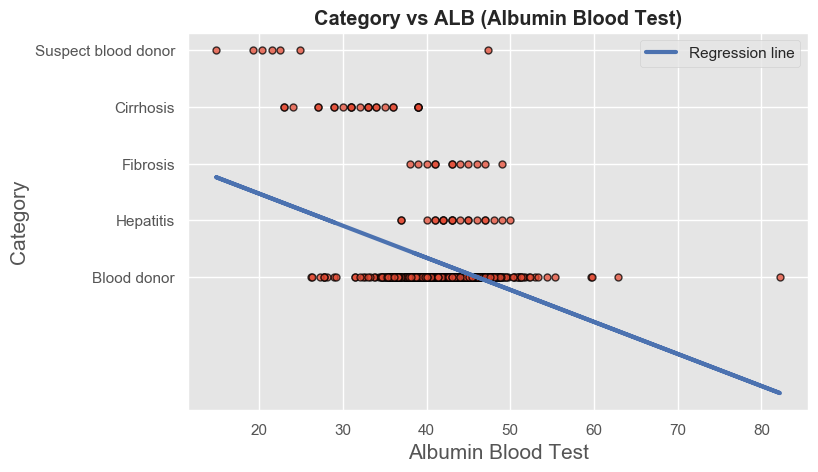

In [66]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs ALB (Albumin Blood Test)', fontdict={'fontweight':'bold'})

plt.scatter(x2,y, s=25, edgecolor='black', linewidth=1, alpha=0.75)

yhat = -0.0566*x2 + 2.6022   # Linear Regression Equation

fig = plt.plot(x2,yhat, lw=3, c='b', label = 'Regression line')

plt.xlabel('Albumin Blood Test', fontsize = 15)
plt.ylabel('Category', fontsize = 15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'ALP' (Alkaline Phosphatase)

In [33]:
y = data['Category']
x3 = data['ALP']

In [34]:
X = sm.add_constant(x3.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           3.90e-26
Time:                        12:13:30   Log-Likelihood:                -635.27
No. Observations:                 589   AIC:                             1275.
Df Residuals:                     587   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6022      0.214     12.140      0.000       2.181       3.023
x1            -0.0566      0.005    -11.104      0.000      -0.067      -0.047
==============================================================================
Omnibus:                      304.850   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1463.036
Skew:                           2.405   Prob(JB):                         0.00
Kurtosis:                       9.040   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No handles with labels found to put in legend.


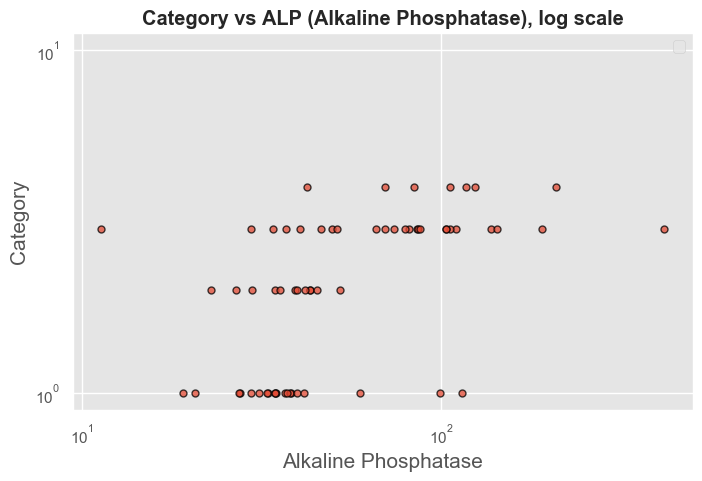

In [65]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs ALP (Alkaline Phosphatase), log scale', fontdict={'fontweight':'bold'})

plt.scatter(x3,y, s=25, edgecolor='black', linewidth=1, alpha=0.75)

#yhat = -0.0566*x3 + 2.6022   # Linear Regression Equation

#fig = plt.plot(x3,yhat, lw=3, c='b', label = 'Regression line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Alkaline Phosphatase', fontsize = 15)
plt.ylabel('Category', fontsize = 15)



plt.legend()
plt.show()

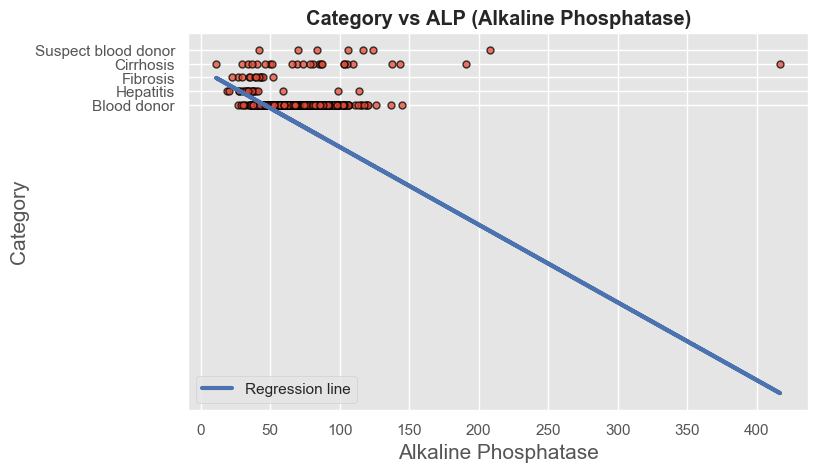

In [63]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs ALP (Alkaline Phosphatase)', fontdict={'fontweight':'bold'})

plt.scatter(x3,y, s=25, edgecolor='black', linewidth=1, alpha=0.75)

yhat = -0.0566*x3 + 2.6022   # Linear Regression Equation

fig = plt.plot(x3,yhat, lw=3, c='b', label = 'Regression line')

plt.xlabel('Alkaline Phosphatase', fontsize = 15)
plt.ylabel('Category', fontsize = 15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'ALT' (Alanine Transaminase)

In [37]:
y = data['Category']
x4 = data['ALT']

In [38]:
x = sm.add_constant(x4.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.553
Date:                Sat, 30 Oct 2021   Prob (F-statistic):              0.213
Time:                        12:14:08   Log-Likelihood:                -690.64
No. Observations:                 589   AIC:                             1385.
Df Residuals:                     587   BIC:                             1394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1932      0.052      3.697      0.000       0.091       0.296
x1             0.0019      0.002      1.246      0.213      -0.001       0.005
==============================================================================
Omnibus:                      414.498   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3373.830
Skew:                           3.279   Prob(JB):                         0.00
Kurtosis:                      12.720   Cond. No.                         54.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

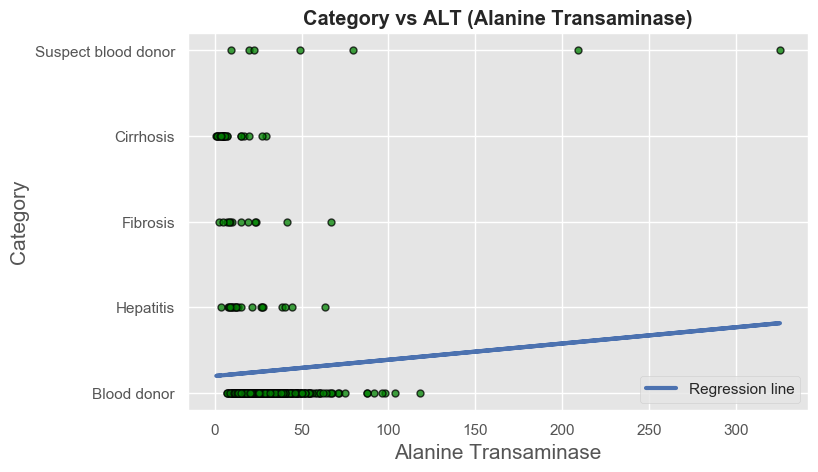

In [62]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs ALT (Alanine Transaminase)', fontdict={'fontweight':'bold'})

plt.scatter(x4,y, s=25, c='green', edgecolor='black', linewidth=1, alpha=0.75)

yhat = 0.0019*x4 + 0.1932   # linear Regression Equation

fig = plt.plot(x4,yhat, lw=3, c='b', label = 'Regression line')

plt.xlabel('Alanine Transaminase', fontsize = 15)
plt.ylabel('Category', fontsize = 15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()


# Ploting the variables: 'Category' and 'AST' (Aspartate Transaminase)

In [42]:
y = data['Category']
x5 = data['AST']

In [43]:
x = sm.add_constant(x5.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     336.4
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           9.61e-60
Time:                        12:50:20   Log-Likelihood:                -557.98
No. Observations:                 589   AIC:                             1120.
Df Residuals:                     587   BIC:                             1129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2414      0.037     -6.533      0.000      -0.314      -0.169
x1             0.0144      0.001     18.342      0.000       0.013       0.016
==============================================================================
Omnibus:                      426.519   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7188.723
Skew:                           3.037   Prob(JB):                         0.00
Kurtosis:                      19.001   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

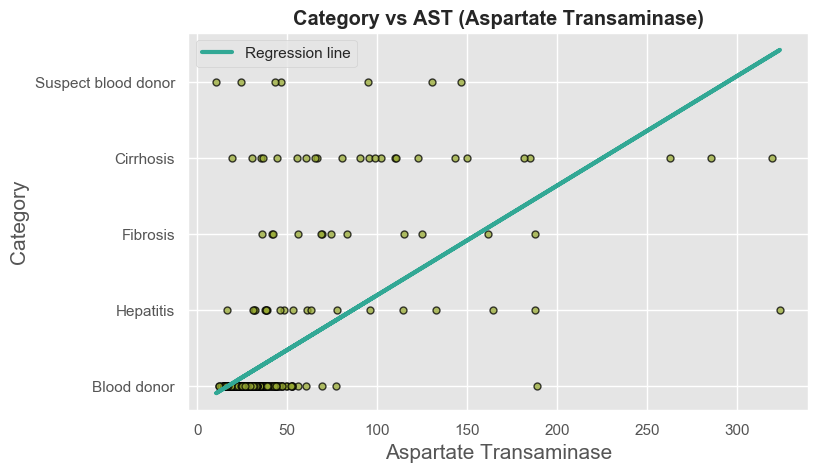

In [61]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs AST (Aspartate Transaminase)', fontdict={'fontweight':'bold'})

plt.scatter(x5,y, s=25, c='#96a832', edgecolor='black', linewidth=1, alpha=0.75)

yhat = 0.0144*x5 + -0.2414   # Linear Regression Equation

fig = plt.plot(x5,yhat, lw=3, c='#32a895', label='Regression line')

plt.xlabel('Aspartate Transaminase', fontsize = 15)
plt.ylabel('Category', fontsize = 15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'BIL' (Bilirubin)

In [45]:
y = data['Category']
x6 = data['BIL']

In [47]:
x = sm.add_constant(x6.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           5.49e-30
Time:                        12:59:40   Log-Likelihood:                -626.43
No. Observations:                 589   AIC:                             1257.
Df Residuals:                     587   BIC:                             1266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0238      0.034      0.696      0.487      -0.043       0.091
x1             0.0200      0.002     12.039      0.000       0.017       0.023
==============================================================================
Omnibus:                      461.982   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5854.107
Skew:                           3.575   Prob(JB):                         0.00
Kurtosis:                      16.690   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

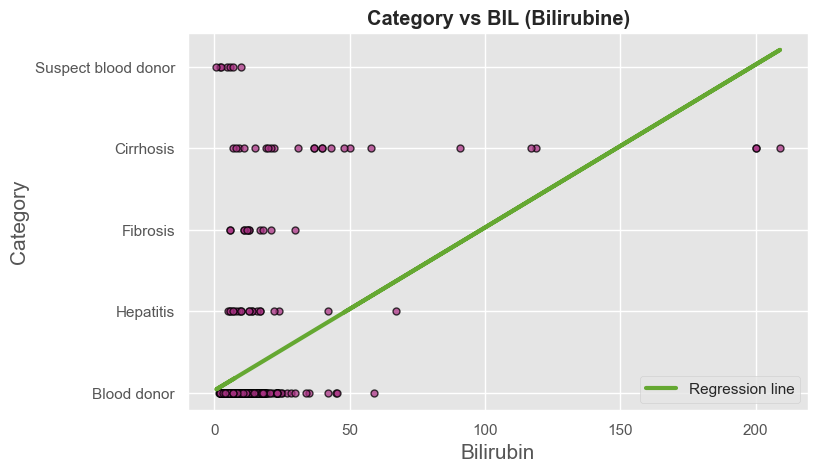

In [60]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs BIL (Bilirubine)', fontdict={'fontweight':'bold'})

plt.scatter(x6,y, s=25, c='#a83283', edgecolor='black', linewidth=1, alpha=0.75)

yhat = 0.0200*x6 + 0.0238   # Linear Regression Equation

fig = plt.plot(x6,yhat, lw=3, c='#65a832', label='Regression line')

plt.xlabel('Bilirubin', fontsize=15)
plt.ylabel('Category', fontsize=15)


plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'CHE' (Acetylcholinesterase)

In [68]:
y = data['Category']
x7 = data['CHE']

In [69]:
x = sm.add_constant(x7.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           7.03e-17
Time:                        13:39:02   Log-Likelihood:                -656.44
No. Observations:                 589   AIC:                             1317.
Df Residuals:                     587   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2260      0.118     10.384      0.000       0.994       1.458
x1            -0.1196      0.014     -8.604      0.000      -0.147      -0.092
==============================================================================
Omnibus:                      382.711   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3058.514
Skew:                           2.934   Prob(JB):                         0.00
Kurtosis:                      12.497   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

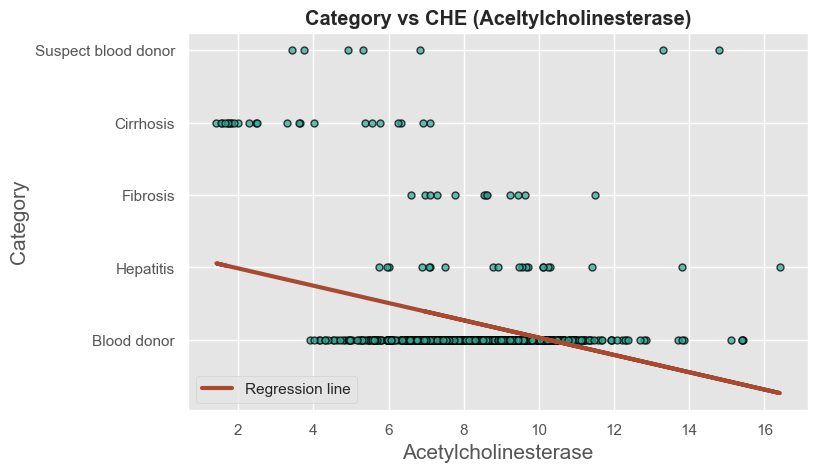

In [71]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs CHE (Aceltylcholinesterase)', fontdict={'fontweight':'bold'})

plt.scatter(x7,y, s=25, c='#32a894', edgecolor='black', linewidth=1, alpha=0.75)

yhat = -0.1196*x7 + 1.2260   # Linear Regression Equation

fig = plt.plot(x7,yhat, lw=3, c='#a84a32', label='Regression line')

plt.xlabel('Acetylcholinesterase', fontsize=15)
plt.ylabel('Category', fontsize=15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'CHOL' (Cholesterol)

In [72]:
y = data['Category']
x8 = data['CHOL']

In [73]:
x = sm.add_constant(x8.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     54.68
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           4.92e-13
Time:                        21:43:18   Log-Likelihood:                -665.19
No. Observations:                 589   AIC:                             1334.
Df Residuals:                     587   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3365      0.151      8.858      0.000       1.040       1.633
x1            -0.2025      0.027     -7.395      0.000      -0.256      -0.149
==============================================================================
Omnibus:                      382.807   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2858.803
Skew:                           2.973   Prob(JB):                         0.00
Kurtosis:                      12.007   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

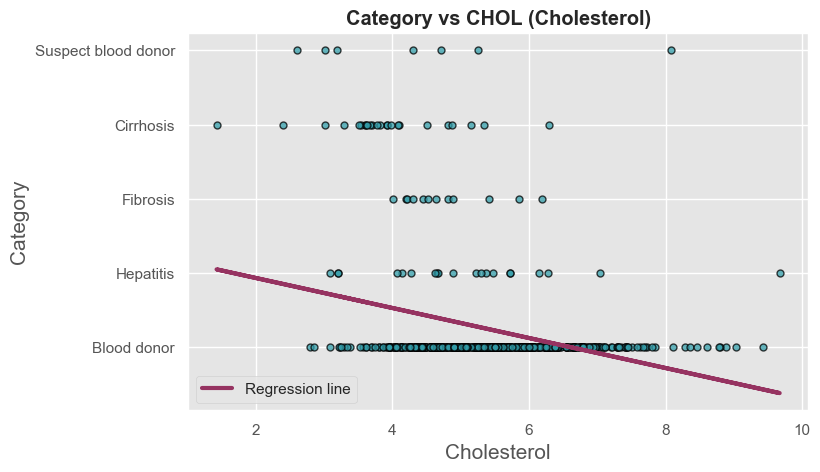

In [74]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs CHOL (Cholesterol)', fontdict={'fontweight':'bold'})

plt.scatter(x8,y, s=25, c='#329ca8', edgecolors='black', linewidth=1, alpha=0.75)

yhat = -0.2025*x8 + 1.3365   # Linear Regression Equation

fig = plt.plot(x8,yhat, lw=3, c='#963361', label='Regression line')

plt.xlabel('Cholesterol', fontsize=15)
plt.ylabel('Category', fontsize=15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'CREA' (Creatine)

In [75]:
y = data['Category']
x9 = data['CREA']

In [76]:
x = sm.add_constant(x9.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     20.49
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           7.26e-06
Time:                        21:55:40   Log-Likelihood:                -681.31
No. Observations:                 589   AIC:                             1367.
Df Residuals:                     587   BIC:                             1375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0127      0.060      0.211      0.833      -0.106       0.131
x1             0.0028      0.001      4.527      0.000       0.002       0.004
==============================================================================
Omnibus:                      432.640   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4054.261
Skew:                           3.404   Prob(JB):                         0.00
Kurtosis:                      13.902   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

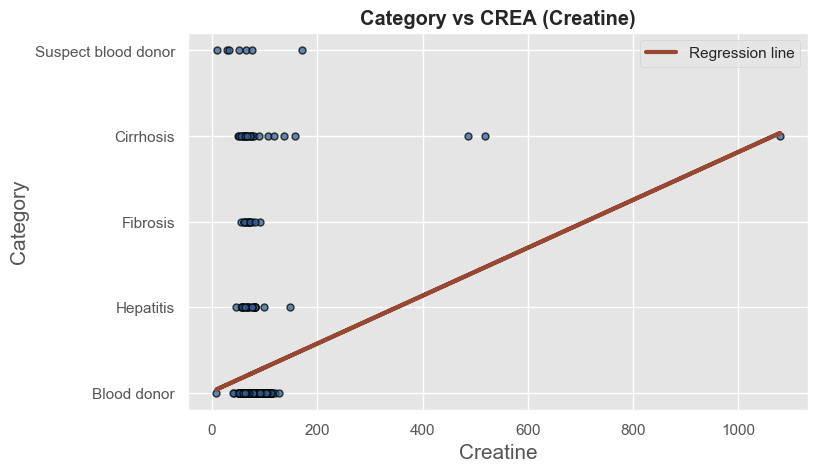

In [80]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs CREA (Creatine)', fontdict={'fontweight':'bold'})

plt.scatter(x9,y, s=25, c='#336096', edgecolor='black', linewidth=1, alpha=0.75)

yhat = 0.0028*x9 + 0.0127   # Linear Regression Equation

fig = plt.plot(x9,yhat, lw=3, c='#964833', label='Regression line')

plt.xlabel('Creatine', fontsize=15)
plt.ylabel('Category', fontsize=15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'GGT' (Gamma-Glutamyl Transferase)

In [78]:
y = data['Category']
x10 = data['GGT']

In [79]:
x = sm.add_constant(x10.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     183.4
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.48e-36
Time:                        22:16:03   Log-Likelihood:                -611.34
No. Observations:                 589   AIC:                             1227.
Df Residuals:                     587   BIC:                             1235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0244      0.034     -0.707      0.480      -0.092       0.043
x1             0.0070      0.001     13.543      0.000       0.006       0.008
==============================================================================
Omnibus:                      394.721   Durbin-Watson:                   0.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3771.473
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      13.883   Cond. No.                         81.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

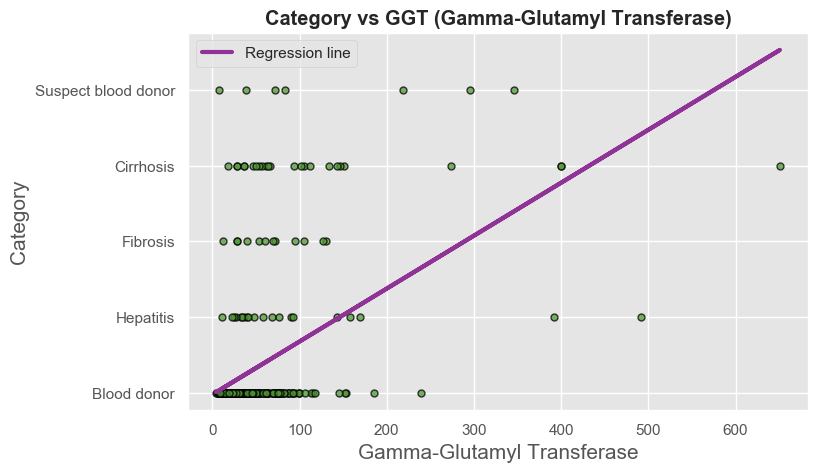

In [82]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs GGT (Gamma-Glutamyl Transferase)', fontdict={'fontweight':'bold'})

plt.scatter(x10,y, s=25, c='#4d9633', edgecolor='black', linewidth=1, alpha=0.75)

yhat = 0.0070*x10 + -0.0244   # Linear Regression Equation

fig = plt.plot(x10,yhat, lw=3, c='#8f3396', label='Regression line')

plt.xlabel('Gamma-Glutamyl Transferase', fontsize=15)
plt.ylabel('Category', fontsize=15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# Ploting the variables: 'Category' and 'PROT' (Proteins)

In [83]:
y = data['Category']
x11 = data['PROT']

In [84]:
x = sm.add_constant(x11.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     35.21
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           5.06e-09
Time:                        22:21:00   Log-Likelihood:                -674.26
No. Observations:                 589   AIC:                             1353.
Df Residuals:                     587   BIC:                             1361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7490      0.423      6.495      0.000       1.918       3.580
x1            -0.0348      0.006     -5.934      0.000      -0.046      -0.023
==============================================================================
Omnibus:                      374.396   Durbin-Watson:                   0.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2469.449
Skew:                           2.954   Prob(JB):                         0.00
Kurtosis:                      11.106   Cond. No.                         973.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

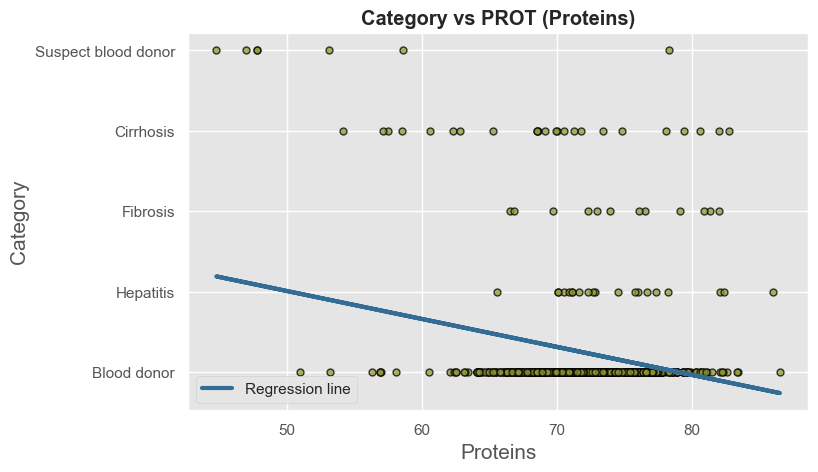

In [85]:
plt.figure(figsize=(8,5), dpi=100)

plt.title('Category vs PROT (Proteins)', fontdict={'fontweight':'bold'})

plt.scatter(x11,y, s=25, c='#8e9633', edgecolor='black', linewidth=1, alpha=0.75)

yhat = -0.0348*x11 + 2.7490   # Linear Regression Equation

fig = plt.plot(x11,yhat, lw=3, c='#336d96', label='Regression line')

plt.xlabel('Proteins', fontsize=15)
plt.ylabel('Category', fontsize=15)

plt.yticks([0,1,2,3,4], ['Blood donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis', 'Suspect blood donor'])

plt.legend()
plt.show()

# General Linear Regression Equation

In [101]:
y = data['Category']
x12 = data[['ALB', 'ALP', 'AST', 'BIL', 'CHOL', 'CREA', 'GGT', 'PROT']]

In [102]:
x = sm.add_constant(x12.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Category   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     107.8
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          1.51e-109
Time:                        22:29:56   Log-Likelihood:                -423.04
No. Observations:                 589   AIC:                             864.1
Df Residuals:                     580   BIC:                             903.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0100      0.292      6.877      0.000       1.436       2.584
x1            -0.0309      0.005     -6.794      0.000      -0.040      -0.022
x2            -0.0018      0.001     -1.902      0.058      -0.004    5.82e-05
x3             0.0088      0.001     11.336      0.000       0.007       0.010
x4             0.0099      0.001      7.833      0.000       0.007       0.012
x5            -0.0689      0.020     -3.470      0.001      -0.108      -0.030
x6             0.0024      0.000      5.891      0.000       0.002       0.003
x7             0.0034      0.001      6.822      0.000       0.002       0.004
x8            -0.0101      0.005     -2.085      0.038      -0.020      -0.001
==============================================================================
Omnibus:                      301.920   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7070.534
Skew:                           1.739   Prob(JB):                         0.00
Kurtosis:                      19.614   Cond. No.                     2.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# General Linear Regression Equation:

## y = 2.0100 + -0.0309*x1 + -0.0018*x2 + 0.0088*x3 + 0.0099*x4 + -0.0689*x5 + 0.0024*x6 + 0.0034*x7 + -0.0101*x8

## Or

## y = 2.0100 + -0.0309 * ALB + -0.0018 * ALP + 0.0088 * AST + 0.0099 * BIL + -0.0689 * CHOL + 0.0024 * CREA + 0.0034 * GGT + -0.0101 * PROT
